In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("darkgrid")

## 1. Projekt – Boston Housing Dataset (numpy)

<p>Wir sollen  ein Regressionsmodell  aus  dem Datensatz “Boston Housing Dataset" für den Median der Hauspreise in
einer Nachbarschaft erstellt. <br>
Dazu müssen wir unser Dataset in zwei Teile zerlegen, um zu sehen, wie gut unser Modell funktioniert. In der einen können wir das Modell trainieren und in der anderen können wir das Modell testen. Für diese Übung haben wir uns entschieden, 80% des Datasets zum Trainieren und 20% zum Testen zu verwenden.</p>


<ul>
    <li>
        <h4> Erster Schritt: Importierung und Bearbeitung </h4>
    </li>
</ul>


In [2]:
boston_data = load_boston()
# Transformation unseres Datensatzes in Data Frame
boston_df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
#Wir erstellen eine neue Spalte mit dem Namen PREIS, die MEDV aus dem Dataset entspricht. 
boston_df['PREIS'] = boston_data.target
boston_df.head() # Schauen die ersten 5 Elemente unseres Datasatzes an
print(boston_df.head())
print(boston_data.DESCR)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PREIS  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
      

c:\Users\Steve\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

<p>Hier haben wir eine neue Spalte hinzugefügt. Dies beinhaltet die Preise von allen Housen. Und jetzt visualisieren wir  die verschiedenen Features und den Zusammenhang mit dem Preis.</p>


Text(9.550000000000004, 0.5, 'PDF')

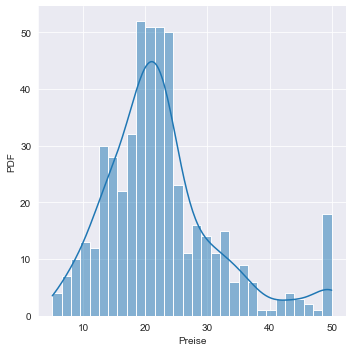

In [3]:
#plt.figure(figsize=(11, 8))
#plt.hist(boston_df['PREIS'], bins = 30)
sns.displot(boston_df['PREIS'], bins = 30, kde= True)# histogram + PDf
plt.xlabel("Preise")
plt.ylabel("PDF") # probability density function

<p>Wir stellen fest, dass in diesem Histogramm die PREIS-Werte normalverteilt sind mit wenigen Ausreißern.<br>
Wir können auch nur mit den Features arbeiten, die eine sehr starke Korrelation (Abhängigkeit) mit dem Preis haben, aber in unserem Fall werden wir mit allen unseren Features arbeiten. Bevor wir dies tun, wollen wir die Abhängigkeit unserer verschiedenen Features vom Preis visualisieren und sehen.</p>


<AxesSubplot:>

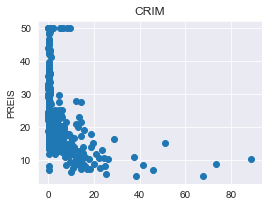

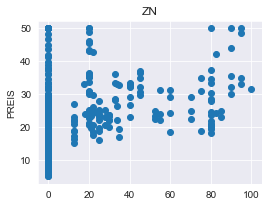

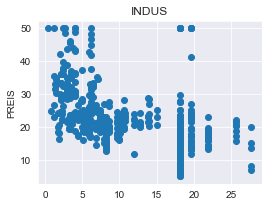

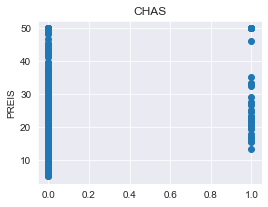

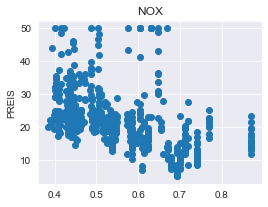

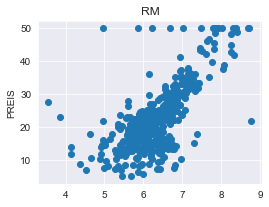

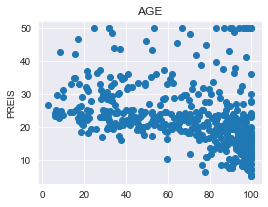

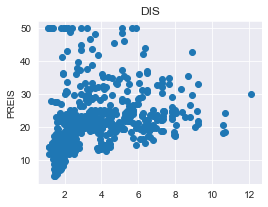

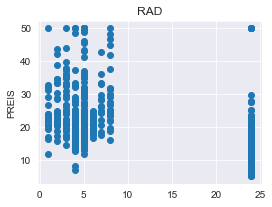

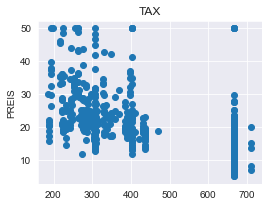

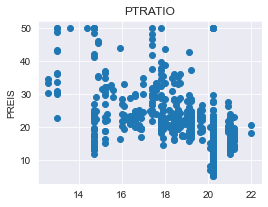

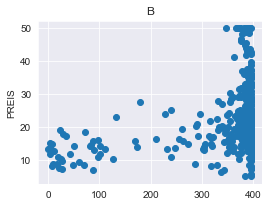

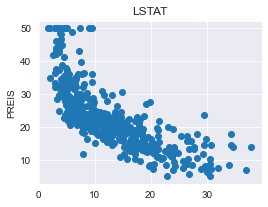

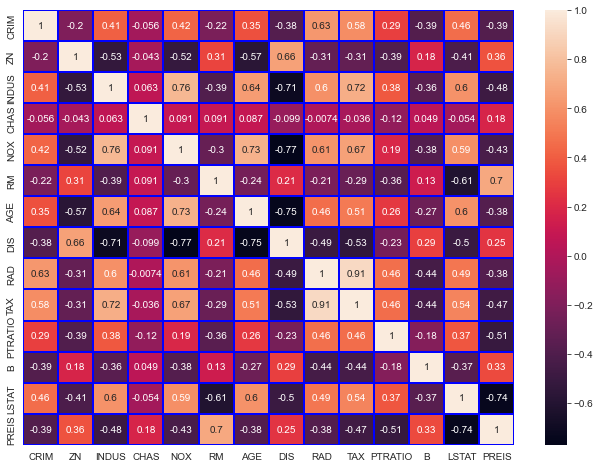

In [4]:

features = boston_data.feature_names
target = boston_df['PREIS']
#fig , axes = plt.subplots(3,4, figsize =(11,8))
for j in features:
    plt.figure(figsize=(4, 3))
    x = boston_df[j]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(j)
    plt.ylabel('PREIS')
    
plt.figure(figsize=(11, 8))
sns.heatmap(boston_df.corr(), annot=True, linewidths=2, linecolor='b')# Korrelation Darstellen


<p>Wenn wir einen schnellen Blick auf die Grafiken anwerfen, dann können wir feststellen, dass Auf <b style=" color: Green">RM-Feature</b> die Preise steigen, wenn der <b>RM-Wert</b> linear ansteigt. Es gibt nur wenige Ausreißer und die Daten scheinen bei 50 gedeckelt zu sein. <br>
Auf <b style=" color: Green">LSTAT-Feature</b>  hingegen tendieren die Preise dazu, mit einer Erhöhung des LSTAT zu sinken. Allerdings scheint er nicht genau einer linearen Linie zu folgen.  Der Grund, warum die RM-Zahlen so stark ansteigen, könnte sein, dass je mehr Zimmer ein Haus hat, desto höher wird der Preis auf dem Markt. Und beim LSTAT wird festgestellt, dass der Kaufpreis von Häusern mit dem Status der Bevölkerung (dem monatlichen Einkommen) sinkt. <br>
Auf <b style=" color: Green">CHAS-Feature</b>  ist auch zu erkennen, dass es eine starke Korrelation mit dem Preis für Werte gleich 0 als gleich 1 gibt. Dies kann ganz einfach dadurch erklärt werden, dass es sich bei den Häusern mit CHAS = 1 um Häuser handelt, die einen Blick auf den Fluss haben, also wahrscheinlich teurer sind als die Häuser, die keinen haben (CHAS=0).


# train_test_split (wird bereit gestellt)
       Teilt den Datensatz in Training (Anteil frac) und Test (Rest) 
       [Xtrain, Xtest, ytrain, ytest] = train_test_split(X,y,frac) 

       - Eingabe: 
              X      Matrix m x n (numpy.ndarray) 
              y      Vektor der Länge m der Zielwerte (numpy.ndarray)
              frac   Anteil im Trainingsset 0 <= frac <= 1  
       - Ausgabe:  
              Xtrain Featurematrix Trainingsset 
              mtrain x n mit mtrain = frac * m (numpy.ndarray)
              Xtest  Featurematrix Testset 
              mtest = m - mtrain (numpy.ndarray) 
              ytrain Vektor Zielwerte Trainingsset Länge mtrain (numpy.ndarray) 
              ytest  Vektor Zielwerte Testset Länge mtest (numpy.ndarray) 
  


In [5]:
def train_test_split(X, y, frac, seed):
    m = X.shape[0]
    np.random.seed(seed)
    index = np.arange(m)
    np.random.shuffle(index)
    cut = int(m*frac)
    return X[index[:cut],:], X[index[cut:],:], y[index[:cut]], y[index[cut:]]


# mean_squared_error 
    - Berechnung des mittleren Fehlerquadrats
    mse = mean_squared_error(y_true, y_pred) 
    + Eingabe: 
        y_true Vektor der Länge m der wahren Zielwerte (numpy.ndarray) 
        y_pred Vektor der Länge m der vorhergesagten Zielwerte (numpy.ndarray)

#### Ausgabe       mse    Mittleres Fehlerquadrat 
#### mse = 1/m sum_(i=1)^m (y_true_i-y_pred_i)^2



In [6]:
def mean_squared_error(y_true, y_pred):
    # TODO: berechne mse
    
    mse = np.mean((y_true - y_pred )**2)
    return mse

# extend_matrix
<p>Erweitert eine Matrix um eine erste Spalte mit Einsen<br>

    X_ext = extend_matrix(X) 

    Eingabe: 
    X Matrix m x n (numpy.ndarray) 
    Ausgabe 
    X_ext Matrix m x (n+1) der Form [1 X] (numpy.ndarray) 
</p>


In [7]:
def extend_matrix(X):
    # TODO: setze X_ext
    
    vek_one = np.ones((X.shape[0], 1))
    X_ext = np.concatenate((vek_one, X), axis=1)
    return X_ext

# LR_fit
    Berechnung der optimalen Parameter der multivariaten linearen Regression
    mithilfe der Normalengleichung.
    theta = LR_fit(X, y)
    +Eingabe:
        X Matrix m x n mit m Datenpunkten und n Features (numpy.ndarray)
        y Vektor der Länge m der Zielwerte (numpy.ndarray)
    +Ausgabe :
        theta Vektor der Länge n+1 der optimalen Parameter (numpy.ndarray)
        Hinweis: Benutzen Sie extend_matrix und np.linalg.solve zur Lösung des
        linearen Gleichungssystems


In [8]:
def LR_fit(X, y):
    # TODO: berechne theta
    Xe = extend_matrix(X)
    Xt = Xe.T
    return np.linalg.solve(Xt.dot(Xe), Xt.dot(y))


# LR_predict
    Berechnung der Vorhersage der der multivariaten linearen Regression.
    y = LR_predict(X,theta)
        +Eingabe:
            X Matrix m x n mit m Datenpunkten und n Features (numpy.ndarray)
            theta Vektor der Länge n+1 der Parameter (numpy.ndarray)
        +Ausgabe
            y Vektor der Länge m der Vorhersagewerte (numpy.ndarray)

     Hinweis: Benutzen Sie extend_matrix.


In [9]:
def LR_predict(X, theta):
    # TODO: berechne y
    y = extend_matrix(X).dot(theta)
    return y

# r2_score
    Berechnung des Bestimmtheitsmaßes R2
    y = r2_score(X, y, theta)

    +Eingabe:
        X Matrix m x n mit m Datenpunkten und n Features (numpy.ndarray)
        y Vektor der Länge m der Zielwerte (numpy.ndarray)
        theta Vektor der Länge n+1 der Parameter (numpy.ndarray)
    + Ausgabe
        r2 Bestimmtheitsmaß R2 (Skalar)

    Hinweis: Benutzen Sie LR_predict


In [10]:
def r2_score(X, y, theta):
    # TODO: berechne r2
    r1 = LR_predict(X, theta)
    num = ((r1 - y)** 2).sum()
    denum = ((y - np.mean(y))**2).sum()
    r2 = np.sqrt(1 - num/denum)
    return r2

<h3>Jetzt können wir unsere Funktionen mit Datensatz testen  </h3>


 MSE: 21.718133186253606
 score: 0.8560148182564835


Text(0.5, 1.0, 'Training_Daten')

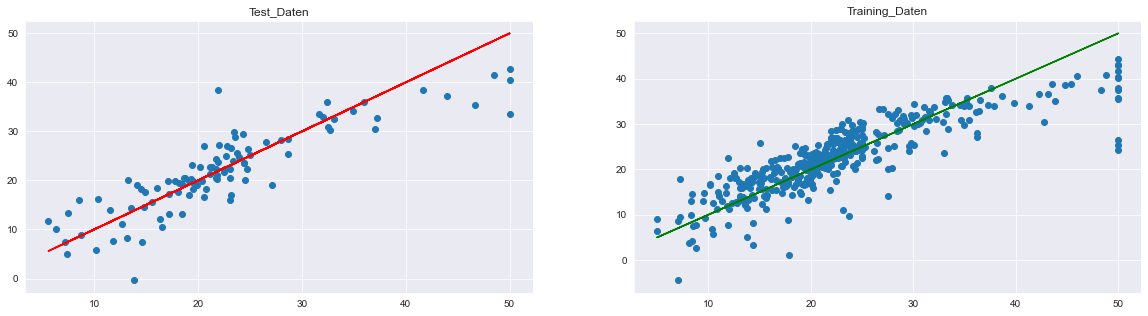

In [11]:
X = boston_data.data
y = boston_data.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 0.8, 5)

X_ext = extend_matrix(Xtrain)

theta =  LR_fit(Xtrain, ytrain)

y_pre = LR_predict(Xtrain, theta)

y_pre_test = LR_predict(Xtest, theta)

sc = r2_score(Xtrain, ytrain, theta)
mse = mean_squared_error(ytest, y_pre_test)

print(f" MSE: {mse}")
print(f" score: {sc}")
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(ytest, y_pre_test, marker='o')
plt.plot(ytest, ytest, c='r')
plt.title("Test_Daten")
plt.subplot(1, 2, 2)
plt.scatter(ytrain, y_pre, marker='o')
plt.plot(ytrain, ytrain, c='g')
plt.title("Training_Daten")

 



<p>Nach der Implementierung haben wir festgestellt, dass MSE sehr groß ist. Das bedeutet dass es einen großen Abstand zwischen die Vorhersage und die reale Value gibt. Dies kann erklären, dass unsere Kostenfunktion  sehr von null ist und größer als eins. Um das zu verbessern, können wir das noch mal mit anderen Methoden minimisieren.</p>